# Trying to figure out what the large sender count heads are doing
Some attention heads send a dominant proportion of the large K edges. What do they do?
See 221102_combined_analysis (~cell 24) for where these heads live.

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gptomics import transformersio, torchio, plot
from transformers import AutoTokenizer

## First idea:
It seems unlikely that these heads compose significantly since they're early. If that's true, they should mostly attend to combinations of tokens in the prompt. Let's try to find the tokens with the largest Q and K vectors (by L2 norm). This won't work reliably if positional information is more important, but position information seems unimportant since we don't see any activation beforehand anyway.

In [2]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")

In [3]:
tensornames = torchio.read_tensor_names("/mnt/02E24FDEE24FD497/LLMs/gpt-neo-2.7B/pytorch_model.bin")

In [4]:
tensornames[:5]

['transformer.wte.weight',
 'transformer.wpe.weight',
 'transformer.h.0.ln_1.weight',
 'transformer.h.0.ln_1.bias',
 'transformer.h.0.attn.attention.bias']

In [5]:
head_dim = 2560 // 20

In [6]:
embed = torchio.read_tensor("/mnt/02E24FDEE24FD497/LLMs/gpt-neo-2.7B/pytorch_model.bin", "transformer.wte.weight")

In [7]:
ln_w = torchio.read_tensor("/mnt/02E24FDEE24FD497/LLMs/gpt-neo-2.7B/pytorch_model.bin", "transformer.h.3.ln_1.weight")

In [8]:
ln_w.shape

torch.Size([2560])

In [9]:
inputs = torch.diag(ln_w.ravel()) @ (embed - embed.mean(0)).T

In [10]:
Q = torchio.read_tensor("/mnt/02E24FDEE24FD497/LLMs/gpt-neo-2.7B/pytorch_model.bin", "transformer.h.3.attn.attention.q_proj.weight")
K = torchio.read_tensor("/mnt/02E24FDEE24FD497/LLMs/gpt-neo-2.7B/pytorch_model.bin", "transformer.h.3.attn.attention.k_proj.weight")

### Head 3, 14

In [36]:
head = 14
Qh = Q[head * head_dim : (head + 1) * head_dim, :]
Kh = K[head * head_dim : (head + 1) * head_dim, :]

In [37]:
qs = Qh @ inputs
ks = Kh @ inputs

In [38]:
qorder = torch.argsort(qs.norm(2, dim=0))
korder = torch.argsort(ks.norm(2, dim=0))

In [39]:
qorder[-10:]

tensor([21849, 38418, 22227, 33853, 40097,  8707, 12208, 31614, 30956, 19373])

In [40]:
korder[-10:]

tensor([13618, 30956, 38195,  7678,  6976, 33853, 14472, 12731, 29027, 27038])

<BarContainer object of 20 artists>

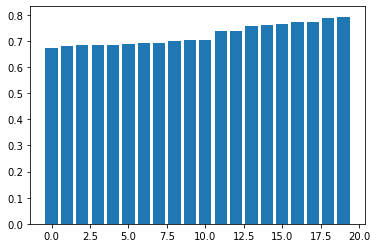

In [41]:
plt.bar(np.arange(20), qs.norm(2, dim=0)[qorder][-20:])

<BarContainer object of 20 artists>

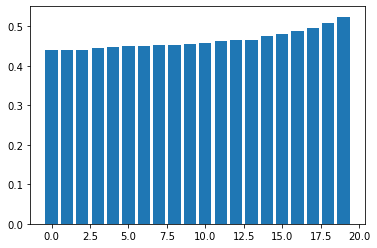

In [42]:
plt.bar(np.arange(20), ks.norm(2, dim=0)[korder][-20:])

(50000.0, 50257.0)

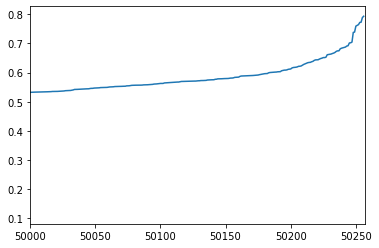

In [43]:
plt.plot(qs.norm(2, dim=0)[qorder])
plt.xlim(50000, len(qorder))

(50000.0, 50257.0)

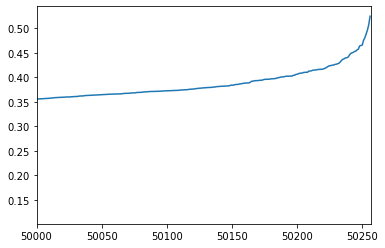

In [44]:
plt.plot(ks.norm(2, dim=0)[korder])
plt.xlim(50000, len(korder))

In [45]:
tokenizer.convert_ids_to_tokens(qorder[-20:])

['Ġathlet',
 'aretz',
 'Ġmosquit',
 'Ġmunicip',
 'Ġlandfall',
 'ĠRemastered',
 'ĠJournals',
 'Ġunpop',
 'Ġsubdu',
 'Ġtaxp',
 'Ġtwent',
 'âĢ¦)',
 'Ġhurd',
 'Ġfilib',
 'Ġuphe',
 'Ġunemploy',
 'Ġtraged',
 'geoning',
 'Ġimpover',
 'Ġadolesc']

In [46]:
tokenizer.convert_ids_to_tokens(korder[-20:])

['ĠPLoS',
 'Ġtaxp',
 'Ġresurg',
 'ĠMedline',
 'Ġanecd',
 'Ġmiscon',
 'Ġendors',
 'Ġprosec',
 'Ġ"âĢ¦',
 'Ġdefund',
 'ĠReached',
 'Ġimpover',
 'ĠObamaCare',
 'Ġoverwhel',
 'Ġathlet',
 'Ġfilib',
 'Ġentert',
 'Ġhorr',
 'ĠAchieve',
 'Ġdismant']

### Head 3, 17

In [47]:
head = 17
Qh = Q[head * head_dim : (head + 1) * head_dim, :]
Kh = K[head * head_dim : (head + 1) * head_dim, :]

In [48]:
qs = Qh @ inputs
ks = Kh @ inputs

In [49]:
qorder = torch.argsort(qs.norm(2, dim=0))
korder = torch.argsort(ks.norm(2, dim=0))

In [50]:
qorder[-10:]

tensor([31614, 41807, 22773, 50089, 34634, 41651, 38418,  5578, 12208, 48608])

In [51]:
korder[-10:]

tensor([42720, 29027,  4840, 12731,  6976, 27038,  5578, 22077, 33853,  7678])

<BarContainer object of 20 artists>

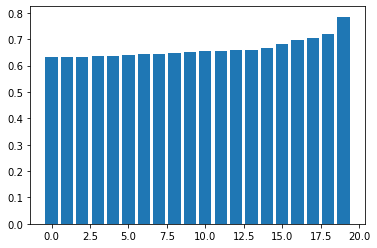

In [52]:
plt.bar(np.arange(20), qs.norm(2, dim=0)[qorder][-20:])

<BarContainer object of 20 artists>

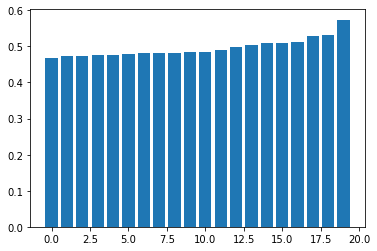

In [53]:
plt.bar(np.arange(20), ks.norm(2, dim=0)[korder][-20:])

(50000.0, 50257.0)

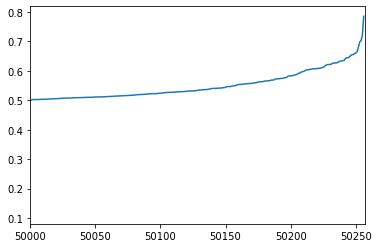

In [54]:
plt.plot(qs.norm(2, dim=0)[qorder])
plt.xlim(50000, len(qorder))

(50000.0, 50257.0)

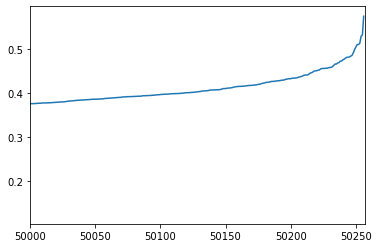

In [55]:
plt.plot(ks.norm(2, dim=0)[korder])
plt.xlim(50000, len(korder))

In [56]:
tokenizer.convert_ids_to_tokens(qorder[-20:])

['URA',
 'ĠTee',
 'ĠInvestor',
 'Ġnuisance',
 'incoln',
 'Ġentert',
 'RGB',
 'aretz',
 'Ń·',
 'ĠWheels',
 'geoning',
 'leanor',
 'ĠRemastered',
 'Ġmarquee',
 'oneliness',
 'gart',
 'âĢ¦)',
 'Ġnegoti',
 'Ġtraged',
 'ĠJournals']

In [57]:
tokenizer.convert_ids_to_tokens(korder[-20:])

['Ġnostalg',
 'Ġthw',
 'Ġimpover',
 'Ġupgr',
 'Ġtodd',
 'Ġsubdu',
 'udicrous',
 'ĠâĢ¦"',
 'Ġdissatisf',
 'Ġtwent',
 '!?"',
 'ĠAchieve',
 'Ġlawy',
 'Ġhorr',
 'Ġathlet',
 'Ġdismant',
 'Ġnegoti',
 'Ġanecd',
 'Ġfilib',
 'Ġoverwhel']

I'm not getting the clearest picture from this. Perhaps it's worth looking at the composition distributions to see if my assumption that they don't compose much is wrong.

In [58]:
compdf = pd.read_csv("../data/slurm/gpt-neo-2.7B_compositions_orig.csv.gz", index_col=0, compression="gzip")

In [59]:
compdf.head()

,src_type,src_block,src_index,dst_type,dst_block,dst_index,term_type,term_value
0,layernorm_bias,0,0,att_head,0,0,Q,0.054723
1,layernorm_bias,0,0,att_head,0,1,Q,0.035219
2,layernorm_bias,0,0,att_head,0,2,Q,0.059307
3,layernorm_bias,0,0,att_head,0,3,Q,0.056989
4,layernorm_bias,0,0,att_head,0,4,Q,0.049334


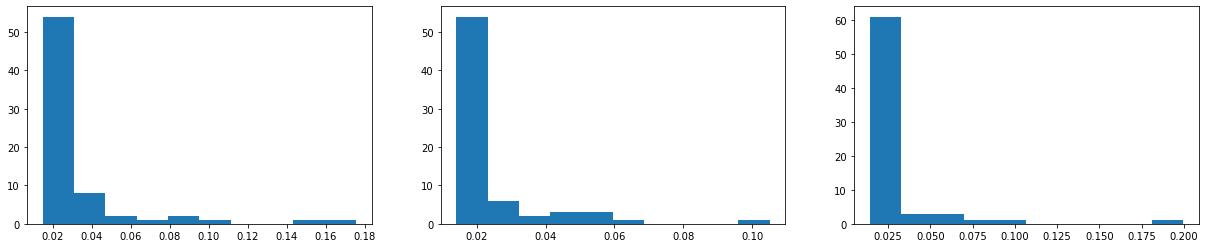

In [63]:
plt.figure(figsize=(21, 4))

def plothist(df, block, index, term_type):
    plt.hist(compdf["term_value"][
        (compdf.dst_block == block) &
        (compdf.dst_index == index) &
        (compdf.term_type == term_type)
    ])
    

plt.subplot(1, 3, 1)
plothist(compdf, 3, 14, "Q")

plt.subplot(1, 3, 2)
plothist(compdf, 3, 14, "K")

plt.subplot(1, 3, 3)
plothist(compdf, 3, 14, "V")

plt.show()

In [66]:
compdf[
    (compdf.dst_block == 3) &
    (compdf.dst_index == 14) &
    (compdf.term_value > 0.1)
]

,src_type,src_block,src_index,dst_type,dst_block,dst_index,term_type,term_value
86763,att_head,2,15,att_head,3,14,K,0.105028
86783,att_head,2,15,att_head,3,14,V,0.199548
87163,mlp_bias,2,0,att_head,3,14,Q,0.175539
126530,layernorm_bias,3,0,att_head,3,14,Q,0.158283


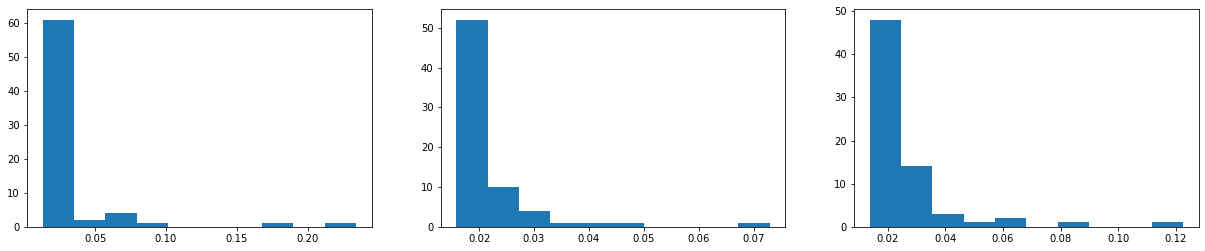

In [64]:
plt.figure(figsize=(21, 4))
    

plt.subplot(1, 3, 1)
plothist(compdf, 3, 17, "Q")

plt.subplot(1, 3, 2)
plothist(compdf, 3, 17, "K")

plt.subplot(1, 3, 3)
plothist(compdf, 3, 17, "V")

plt.show()

In [67]:
compdf[
    (compdf.dst_block == 3) &
    (compdf.dst_index == 17) &
    (compdf.term_value > 0.1)
]

,src_type,src_block,src_index,dst_type,dst_block,dst_index,term_type,term_value
86786,att_head,2,15,att_head,3,17,V,0.122456
87166,mlp_bias,2,0,att_head,3,17,Q,0.234123
126533,layernorm_bias,3,0,att_head,3,17,Q,0.181144


It looks like the Qs have pretty high compositions in both cases (with biases)

In [72]:
np.percentile(compdf.term_value, 99.9)

0.10420830883923536